Client ID and Client Secret found -- Initializing -- AzureChatOpenAI


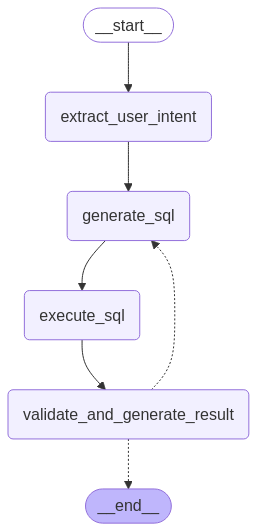

Final Result: [{'result': [{'TotalEmployees': 9}]}]
__________ {'messages': [HumanMessage(content='How Many employees are there in the database?', additional_kwargs={}, response_metadata={}, id='ed004d71-c001-4049-ba27-9d1ee2da8a5d'), AIMessage(content='To generate accurate SQL queries based on the user’s request, the following prompt can be used:\n\n"Please provide the SQL query needed to count the total number of employees in the employees table of the database. Ensure that the query retrieves the correct count of all employee records currently stored in the database without any filters or conditions."\n\nThis prompt clarifies the intent to count employees and specifies the relevant database table.', additional_kwargs={}, response_metadata={}, id='cbcb5406-fb89-4704-81aa-e392630fd05d'), AIMessage(content='SELECT COUNT(*) AS TotalEmployees FROM Employees;', additional_kwargs={}, response_metadata={}, id='f2e45d6a-cdc4-477f-8c3b-d8b3e40e2e06'), AIMessage(content="[{'result': [{'TotalEm

In [ ]:
# main.py
from db_plugins.sqlite_adapter import SQLiteAdapter
from modular_db_agent import ModularDBAgent, DBState
from azure_openai_llm import get_llm
from langchain_core.messages import HumanMessage
from IPython.display import display, Image

sqlite_adapter = SQLiteAdapter("sqlite:///northwind.db")

# print("SQLite Adapter Initialized", sqlite_adapter.get_schema_metadata())

llm = get_llm()

agent = ModularDBAgent(adapter=sqlite_adapter, llm=llm)
graph = agent.compile_graph()

initial_state = DBState(messages=[
    HumanMessage(content="How Many employees are there in the database?"),
])


display(Image(graph.get_graph().draw_mermaid_png()))

result = graph.invoke(initial_state, config={"configurable": {"thread_id": "thread_1"}})
print("Final Result:", result["result"])

print("__________",result)

In [9]:
initial_state = DBState(messages=[
    HumanMessage(content="Get the Details of the customers from only france in Proper table format"),
])

# display(Image(graph.get_graph().draw_mermaid_png()))

result = graph.invoke(initial_state, config={"configurable": {"thread_id": "thread_1"}})
# print("Final Result:", result["result"])
print("__________",result["messages"][-1].content)

__________ Sure! Here’s a friendly summary of the results from your SQL query:

The query successfully retrieved a list of customers that are exclusively located in France, as intended. Each entry includes a variety of important details about the customers, such as their unique CustomerID, CompanyName, the name of the contact person, their address, city, region, postal code, and phone number.

Here’s a quick overview of what the results include:

- **CustomerID**: A unique identifier for each customer.
- **CompanyName**: The name of the business.
- **ContactName**: The name of the person to contact at the company.
- **Address**: The physical address of the business.
- **City**: The city where the business is located.
- **Region**: The broader geographic region, which is all noted as "Western Europe."
- **PostalCode**: The relevant postal code.
- **Phone**: The contact number for the business.

In total, there are numerous customers from various cities in France, such as Strasbourg, Mar